In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
dataset = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train= X_train/255.0
X_test= X_test/255.0

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [7]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

In [8]:
model.add(Dense(10, activation='softmax'))
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=3, batch_size=12, validation_split=0.1)

Epoch 1/3
4500/4500 [==============================] - 8s 2ms/step - loss: 0.2917 - acc: 0.9120 - val_loss: 0.1151 - val_acc: 0.9670
Epoch 2/3
4500/4500 [==============================] - 8s 2ms/step - loss: 0.1517 - acc: 0.9539 - val_loss: 0.0897 - val_acc: 0.9745
Epoch 3/3
4500/4500 [==============================] - 8s 2ms/step - loss: 0.1234 - acc: 0.9623 - val_loss: 0.0894 - val_acc: 0.9770


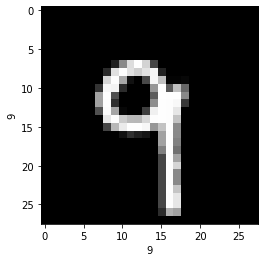

In [9]:
plt.imshow(X_test[1255].reshape(28,28), cmap='gray')
plt.xlabel(y_test[1255])
plt.ylabel(np.argmax(model.predict(X_test)[1255]))
model.save('digit_trained.h5')

In [10]:
run = False
ix,iy = -1,-1
follow = 25
img = np.zeros((512,512,1))
### func
def draw(event, x, y, flag, params):
    global run,ix,iy,img,follow
    if event == cv2.EVENT_LBUTTONDOWN:
        run = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if run == True:
            cv2.circle(img, (x,y), 20, (255,255,255), -1)

    elif event == cv2.EVENT_LBUTTONUP:
        run = False
        cv2.circle(img, (x,y), 20, (255,255,255), -1)
        gray = cv2.resize(img, (28, 28))
        gray = gray.reshape(1, 784)
        result = np.argmax(model.predict(gray))
        result = 'cnn : {}'.format(result)
        cv2.putText(img, org=(25,follow), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, text= result, color=(255,0,0), thickness=1)
        follow += 25
    elif event == cv2.EVENT_RBUTTONDOWN:
        img = np.zeros((512,512,1))
        follow = 25

In [ ]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw)
while True:    
    cv2.imshow("image", img) 
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()
